Imports and data uploads
-----------

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter('ignore')
import os
from scipy import stats
import colorcet as cc
import scipy
%matplotlib inline

In [2]:
# upload data
cpath = os.getcwd() #assumes all files are in the same path as the notebook
mean_df = pd.read_csv(cpath+'/mean_df_female.csv')

# ----------------------------------------------------------------------- 
# ANALYSIS
# -----------------------------------------------------------------------

In [3]:
# plot/colors definitions
data_loc=cpath+'/figs/'
try:
    os.mkdir(data_loc)
except FileExistsError:
    # directory already exists
    pass

plt.style.use("seaborn-paper")
phasec = ['#CE3045','#EF7C32','#FFDD00','#939598']
cmap2 = [cc.glasbey[4],cc.glasbey[10],cc.glasbey[13],cc.glasbey[15]]

In [4]:
def KLD_analysis(frequencies):
    '''rows are sessions (or mice/phases), columns are variables (syllables)'''
    cohort_dist=np.zeros((len(frequencies),len(frequencies)),dtype=float)
    x=0
    y=0
    for i in frequencies:
        for j in frequencies:
            i[i==0]=.0000000001
            j[j==0]=.0000000001
            cohort_dist[x,y]=scipy.stats.entropy(pk=np.array(i), qk=np.array(j))
            y=y+1
        y=0
        x=x+1
    return cohort_dist

In [5]:
# Preapre data for plotting
df_data = mean_df.copy()
data = df_data.groupby(by = ['group','mouse', 'rep','syllable']).mean()['usage'].reset_index()
keep_mice = ['02_01','04_04', '03_03', '04_02'] 
data_temp = data[data.mouse.isin(keep_mice)]
ax_labels=keep_mice

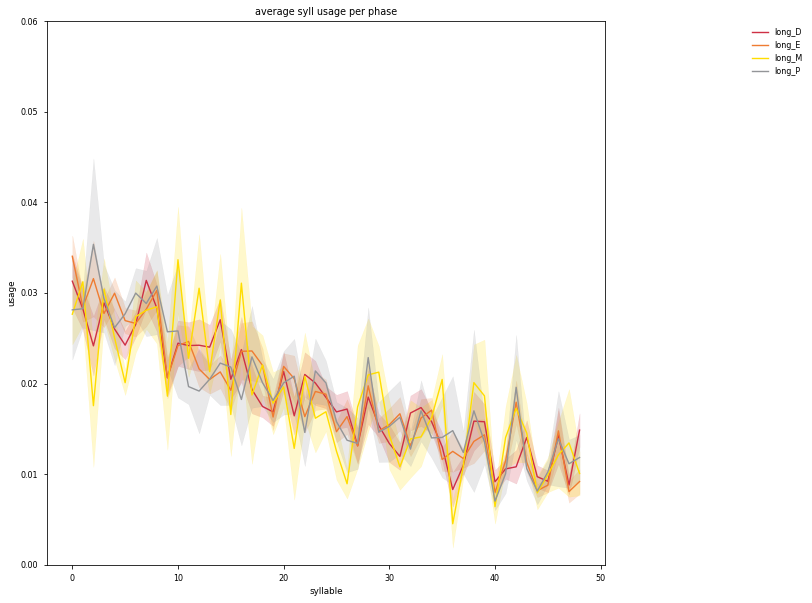

In [6]:
# syllable usage per phase
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax = sns.lineplot(x="syllable",y="usage",data=data_temp, hue='group',palette=phasec, errorbar="se", markers=True)
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1.25, 1))
ax.set_title('average syll usage per phase')
ax.set_ylim([0,0.06])
fig.savefig(data_loc +'syll_usage_per_phase_4mice.pdf', bbox_inches='tight')

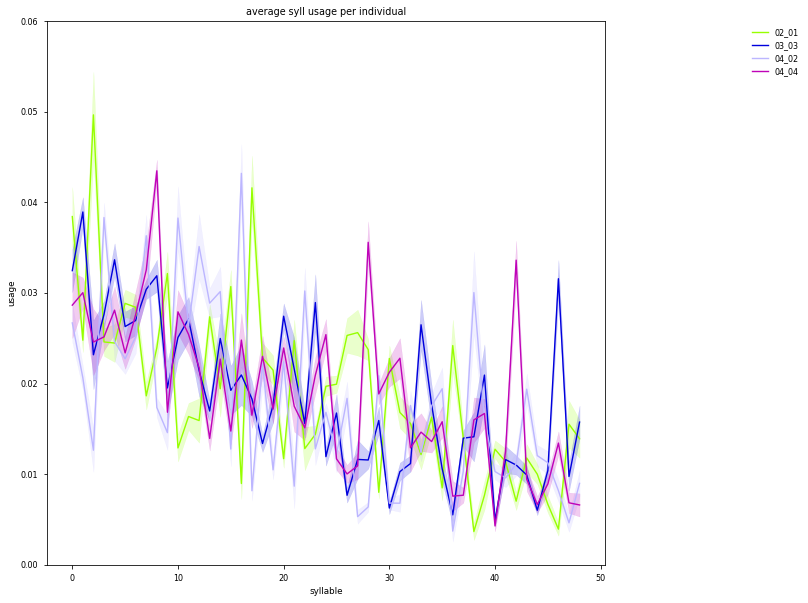

In [7]:
# syllable usage per individual
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax = sns.lineplot(x="syllable",y="usage",data=data_temp, hue='mouse',palette=cmap2, errorbar="se", markers=True)
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1.25, 1))
ax.set_title('average syll usage per individual')
ax.set_ylim([0,0.06])
fig.savefig(data_loc +'syll_usage_per_indv_4mice.pdf', bbox_inches='tight')

# KLD analysis

In [8]:
# KLD between phases
data = pd.pivot_table(data_temp, values='usage', index=['group', 'rep','mouse'], columns=['syllable']).reset_index().fillna(0)
# for all sessions
kld_all=[]
data_all=data.drop(['group', 'rep','mouse'], axis=1).to_numpy()
kld_all=KLD_analysis(data_all)

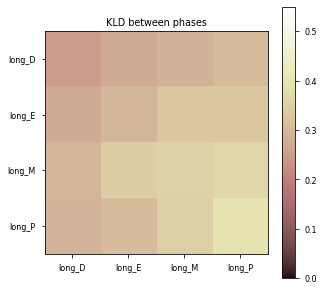

In [9]:
# get labels to generate comparisons
p = data['group'].unique()
praws = data['group'].to_numpy()
pcol = data['group'].to_numpy()
mall=[]
for pc in p:
    for pr in p:
        curr = (kld_all[:,pcol==pc][praws==pr,:]).flatten()
        mcurr = np.mean(curr[curr!=0])
        mall.append(mcurr)
to_plot=np.array(mall).reshape(4,4).T
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
im = plt.imshow(to_plot, cmap='pink', vmin=0, vmax=0.55)
cbar = plt.colorbar(im)
plt.xticks(range(len(ax_labels)), p)
plt.yticks(range(len(ax_labels)), p)
ax.set_title('KLD between phases')
fig.savefig(data_loc +'kld_phase_4mice.pdf', bbox_inches='tight')

In [10]:
# KLD between individuals
data = pd.pivot_table(data_temp, values='usage', index=['mouse','group', 'rep'], columns=['syllable']).reset_index().fillna(0)
# for all sessions
kld_all=[]
data_all=data.drop(['mouse', 'group','rep'], axis=1).to_numpy()
kld_all=KLD_analysis(data_all)

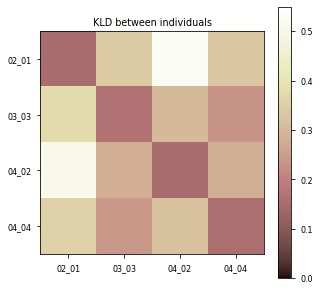

In [11]:
# get labels to generate comparisons
p = data['mouse'].unique()
praws = data['mouse'].to_numpy()
pcol = data['mouse'].to_numpy()
mall=[]
for pc in p:
    for pr in p:
        curr = (kld_all[:,pcol==pc][praws==pr,:]).flatten()
        mcurr = np.mean(curr[curr!=0])
        mall.append(mcurr)
to_plot=np.array(mall).reshape(4,4).T
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
im = plt.imshow(to_plot, cmap='pink', vmin=0, vmax=0.55)
cbar = plt.colorbar(im)
plt.xticks(range(len(ax_labels)), p)
plt.yticks(range(len(ax_labels)), p)
ax.set_title('KLD between individuals')
fig.savefig(data_loc +'kld_indv_4mice.pdf', bbox_inches='tight')